In [1]:
import numpy as np
import polars as pl
from sympy import *
import scipy.interpolate as spi
import matplotlib.pyplot as plt

The upper portion of this noble beast is to be approximated using natural cubic spline interpolants.

The curve is drawn on a grid from which the table is constructed. Use algorithm to construct the three clamped cubic splines.

Graph the derived piecewise function approximating the curve.

We have three given values tables:

In [2]:
x_vals_1 = [1 , 2, 5, 6, 7, 8, 10, 13, 17]
y_vals_1 = [3, 3.7, 3.9, 4.2, 5.7, 6.6, 7.1, 6.7, 4.5]
fprime_1 = [1, (-2/3)]

table_1 = { "x": x_vals_1, 
            "f(x)": y_vals_1, 
            "f'(x)": [fprime_1[0]] + [None]*(len(x_vals_1)-2) + [fprime_1[1]] }

x_vals_2 = [17, 20, 23, 24, 25, 27, 27.7]
y_vals_2 = [4.5, 7, 6.1, 5.6, 5.8, 5.2, 4.1]
fprime_2 = [3, -4]

table_2 = { "x": x_vals_2, 
            "f(x)": y_vals_2, 
            "f'(x)": [fprime_2[0]] + [None]*(len(x_vals_2)-2) + [fprime_2[1]] }

x_vals_3 = [27.7, 28, 29, 30]
y_vals_3 = [4.1, 4.3, 4.1, 3]
fprime_3 = [1/3, (-3/2)]
table_3 = { "x": x_vals_3, 
            "f(x)": y_vals_3, 
            "f'(x)": [fprime_3[0]] + [None]*(len(x_vals_3)-2) + [fprime_3[1]] }

combined_x_vals = x_vals_1 + x_vals_2 + x_vals_3
combined_y_vals = y_vals_1 + y_vals_2 + y_vals_3

In [3]:
print("The first piecewise interpolation is:")
print(pl.DataFrame(table_1, strict=False))

The first piecewise interpolation is:
shape: (9, 3)
┌─────┬──────┬───────────┐
│ x   ┆ f(x) ┆ f'(x)     │
│ --- ┆ ---  ┆ ---       │
│ i64 ┆ f64  ┆ f64       │
╞═════╪══════╪═══════════╡
│ 1   ┆ 3.0  ┆ 1.0       │
│ 2   ┆ 3.7  ┆ null      │
│ 5   ┆ 3.9  ┆ null      │
│ 6   ┆ 4.2  ┆ null      │
│ 7   ┆ 5.7  ┆ null      │
│ 8   ┆ 6.6  ┆ null      │
│ 10  ┆ 7.1  ┆ null      │
│ 13  ┆ 6.7  ┆ null      │
│ 17  ┆ 4.5  ┆ -0.666667 │
└─────┴──────┴───────────┘


In [4]:
print("The second piecewise interpolation is:")
print(pl.DataFrame(table_2, strict=False))

The second piecewise interpolation is:
shape: (7, 3)
┌──────┬──────┬───────┐
│ x    ┆ f(x) ┆ f'(x) │
│ ---  ┆ ---  ┆ ---   │
│ f64  ┆ f64  ┆ i64   │
╞══════╪══════╪═══════╡
│ 17.0 ┆ 4.5  ┆ 3     │
│ 20.0 ┆ 7.0  ┆ null  │
│ 23.0 ┆ 6.1  ┆ null  │
│ 24.0 ┆ 5.6  ┆ null  │
│ 25.0 ┆ 5.8  ┆ null  │
│ 27.0 ┆ 5.2  ┆ null  │
│ 27.7 ┆ 4.1  ┆ -4    │
└──────┴──────┴───────┘


In [5]:
print("The third piecewise interpolation is:")
print(pl.DataFrame(table_3, strict=False))

The third piecewise interpolation is:
shape: (4, 3)
┌──────┬──────┬──────────┐
│ x    ┆ f(x) ┆ f'(x)    │
│ ---  ┆ ---  ┆ ---      │
│ f64  ┆ f64  ┆ f64      │
╞══════╪══════╪══════════╡
│ 27.7 ┆ 4.1  ┆ 0.333333 │
│ 28.0 ┆ 4.3  ┆ null     │
│ 29.0 ┆ 4.1  ┆ null     │
│ 30.0 ┆ 3.0  ┆ -1.5     │
└──────┴──────┴──────────┘


In [6]:
cs1 = spi.CubicSpline(x=x_vals_1, 
                     y=y_vals_1, 
                     bc_type=((1, fprime_1[0]), (1, fprime_1[1]))
                     )

cs2 = spi.CubicSpline(x=x_vals_2, 
                     y=y_vals_2, 
                     bc_type=((1, fprime_2[0]), (1, fprime_2[1]))
                     )

cs3 = spi.CubicSpline(x=x_vals_3, 
                     y=y_vals_3, 
                     bc_type=((1, fprime_3[0]), (1, fprime_3[1]))
                     )

In [7]:
for idx, (p, v) in enumerate([(cs1, x_vals_1), (cs2, x_vals_2), (cs3, x_vals_3)]):
    a = p.c[3, :]  
    b = p.c[2, :]  
    c = p.c[1, :]  
    d = p.c[0, :]  
    
    print(f"for the {idx+1}th spline:")
    for i in range(len(v) - 1):
        print(f"S_{i}(x) = {a[i]} + {b[i]}*(x - {v[i]}) + {c[i]}*(x - {v[i]})^2 + {d[i]}*(x - {v[i]})^3")
        print("")

for the 1th spline:
S_0(x) = 3.0 + 1.0000000000000002*(x - 1) + -0.34680986128021796*(x - 1)^2 + 0.04680986128021791*(x - 1)^3

S_1(x) = 3.7 + 0.4468098612802181*(x - 2) + -0.20638027743956394*(x - 2)^2 + 0.026555293078348922*(x - 2)^3

S_2(x) = 3.9 + -0.07447889024174467*(x - 5) + 0.03261736026557638*(x - 5)^2 + 0.3418615299761686*(x - 5)^3

S_3(x) = 4.2 + 1.0163404202179138*(x - 6) + 1.0582019501940834*(x - 6)^2 + -0.5745423704119972*(x - 6)^3

S_4(x) = 5.7 + 1.409117209370089*(x - 7) + -0.6654251610419077*(x - 7)^2 + 0.1563079516718182*(x - 7)^3

S_5(x) = 6.6 + 0.5471907423017282*(x - 8) + -0.19650130602645327*(x - 8)^2 + 0.023952967437794598*(x - 8)^3

S_6(x) = 7.1 + 0.048621127449450234*(x - 10) + -0.05278350139968573*(x - 10)^2 + -0.002622661842636246*(x - 10)^3

S_7(x) = 6.7 + -0.3388917506998428*(x - 13) + -0.07638745798341195*(x - 13)^2 + 0.00590259891459316*(x - 13)^3

for the 2th spline:
S_0(x) = 4.5 + 3.0*(x - 17) + -1.1007084510629728*(x - 17)^2 + 0.12616207628025017*(x - 

In [8]:
x_sample_values_1 = np.arange(1, 17, 0.1)
cs1_sample_vals = cs1(x_sample_values_1)

x_sample_values_2 = np.arange(17, 27.7, 0.1)
cs2_sample_vals = cs2(x_sample_values_2)

x_sample_values_3 = np.arange(27.7, 30, 0.1)
cs3_sample_vals = cs3(x_sample_values_3)

x_vals_plot = np.arange(1, 30.1, 0.1)
cs_vals = np.concatenate((cs1_sample_vals, cs2_sample_vals, cs3_sample_vals))

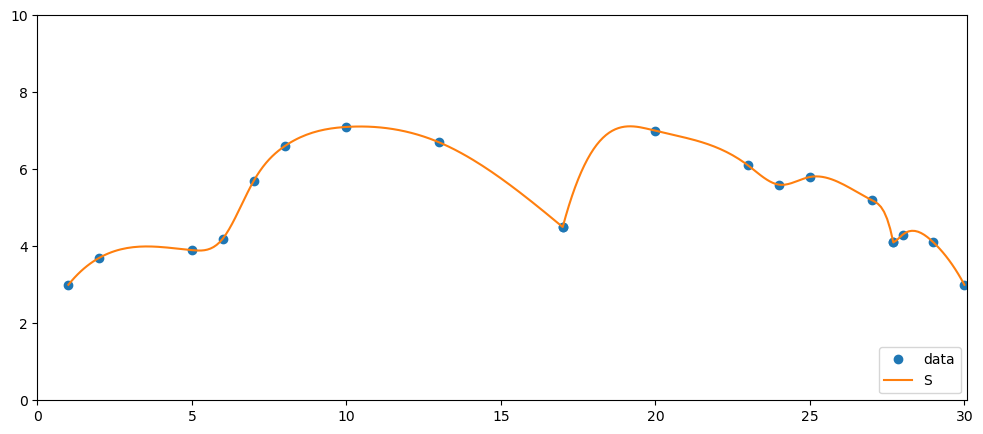

In [9]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(combined_x_vals, combined_y_vals, 'o', label='data')
ax.plot(x_vals_plot, cs_vals, label="S")
ax.set_xlim(0, 30.1)
ax.set_ylim(0, 10)
ax.legend(loc='lower right')
plt.show()